In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weight-height.csv to weight-height.csv
User uploaded file "weight-height.csv" with length 428120 bytes


In [ ]:
import pandas as pd

In [ ]:
! ls

sample_data  weight-height.csv


In [ ]:
data=pd.read_csv('weight-height.csv')

In [ ]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
import seaborn as sns

<ipython-input-8-e279832769cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set1')


NameError: name 'plt' is not defined

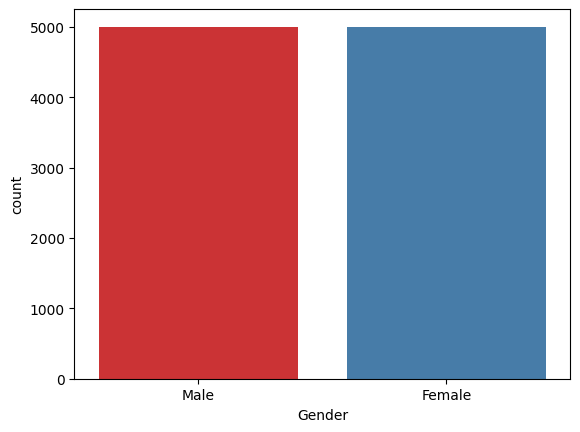

In [ ]:
sns.countplot(x='Gender', data=data, palette='Set1')
plt.xlabel('Gender distribution')

In [ ]:
len(data[data.Gender=='Male'])

5000

In [ ]:
len(data[data.Gender!='Male'])

5000

In [ ]:
data.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [ ]:
data['height_cm'] = data.Height * 2.54

In [ ]:
data.height_cm.describe()

count    10000.000000
mean       168.573602
std          9.772721
min        137.828359
25%        161.304276
50%        168.447898
75%        175.702625
max        200.656806
Name: height_cm, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

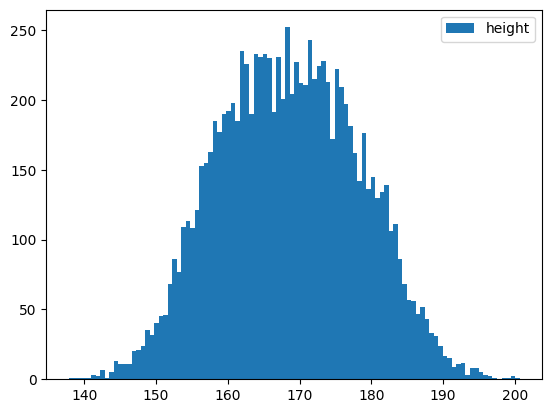

In [ ]:
plt.hist(data.height_cm, bins=100, label='height')
plt.legend()
plt.show()

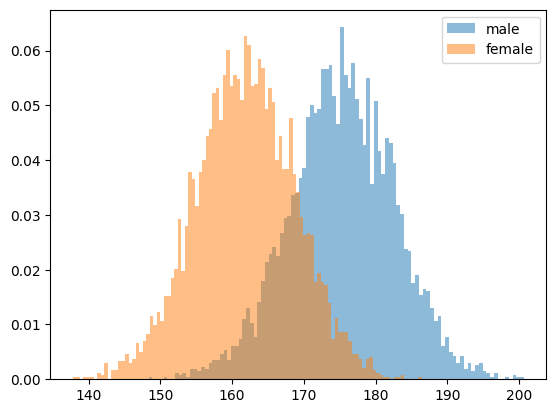

In [ ]:
plt.hist(data[data.Gender=='Male'].height_cm, bins=100, label='male', alpha=0.5, density=True)
plt.hist(data[data.Gender!='Male'].height_cm, bins=100, label='female', alpha=0.5, density=True)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

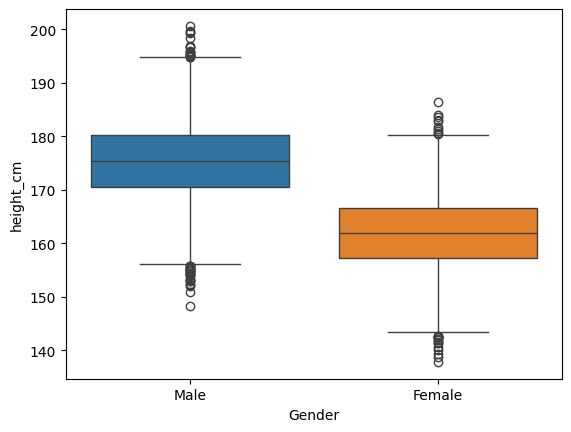

In [ ]:
sns.boxplot(x='Gender', y='height_cm', data=data, hue='Gender')

plt.show()

In [ ]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Women heights')

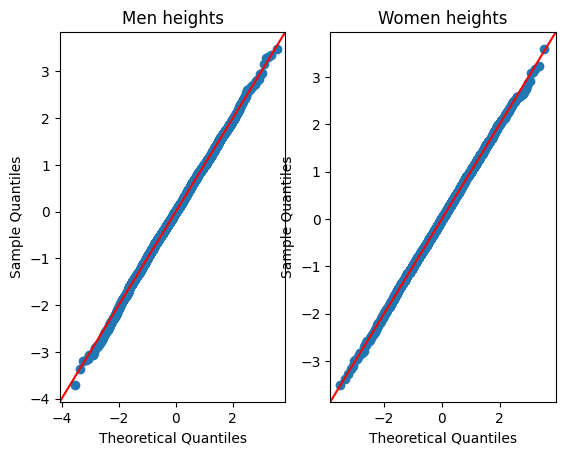

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

male_rows = data[data.Gender=='Male']
female_rows = data[data.Gender!='Male']
standardized_height_men = (male_rows.height_cm - male_rows.height_cm.mean()) /  male_rows.height_cm.std()
standardized_height_women = (female_rows.height_cm - female_rows.height_cm.mean()) /  female_rows.height_cm.std()

sm.qqplot(standardized_height_men, line='45', ax=ax1)
ax1.set_title('Men heights')
sm.qqplot(standardized_height_women, line='45', ax=ax2)
ax2.set_title('Women heights')